Track analysis diurnal cycle
============

Analysis of track data only i.e. no linking to pixel-level data or ERA5. Diurnal cycle. Note, all of this uses MCS occurrence based on 2D histograms of lat/lon points (e.g. tracks.dstracks.meanlat). This is different from the work in Feng et al. (2021) which uses pixel masks based on swath of MCS mask to count numbers. An interesting comparison can be drawn with the work of Mohr and Zipser (1996), where they find ocean MCSs are more frequent at sunrise, land MCSs more frequent at sunset. Below I find much the same thing.

* 19/5/22: initial work, building off ideas I had played around with in `ipython`. Add in a fractional anomaly.
* 9/8/22: Update to use new way of calling plotting code.

In [1]:
import datetime as dt

import dask
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import interpolate

from mcs_prime import McsTracks, PATHS
from mcs_prime.util import update_progress
from mcs_prime import plotting
%matplotlib inline

Load all tracks from 2000/6-2020/12

In [2]:
tracks = tracks = McsTracks.mfload(str(PATHS['statsdir'] / 'mcs_tracks_final_extc_*.0000.nc'), PATHS['pixeldir'])
ntracks = len(tracks.dstracks.tracks)
tracks

McsTracks[2000-06-01 00:30:00, 2020-12-31 22:30:00, ntracks=696293]

In [3]:
dhours = 3
tracks.dstracks.meanlon.load()
tracks.dstracks.meanlat.load();

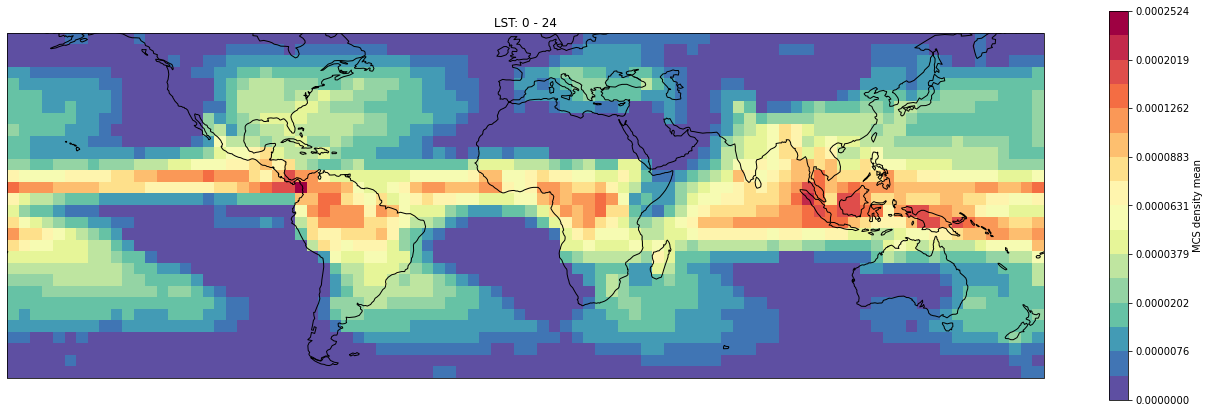

In [4]:
# Simple way of plotting the mean MCS number density.
plotting.plot_diurnal_cycle(tracks, dhours=24, mode='mean')
fig = plt.gcf()
fig.set_size_inches(20, 6)

Mean numbers of MCS in each 4x4 grid cell. Things to note - there are far more MCSs in general over ITCZ, N Amazon, eq. Africa, Maritme Continent (particularly over land).

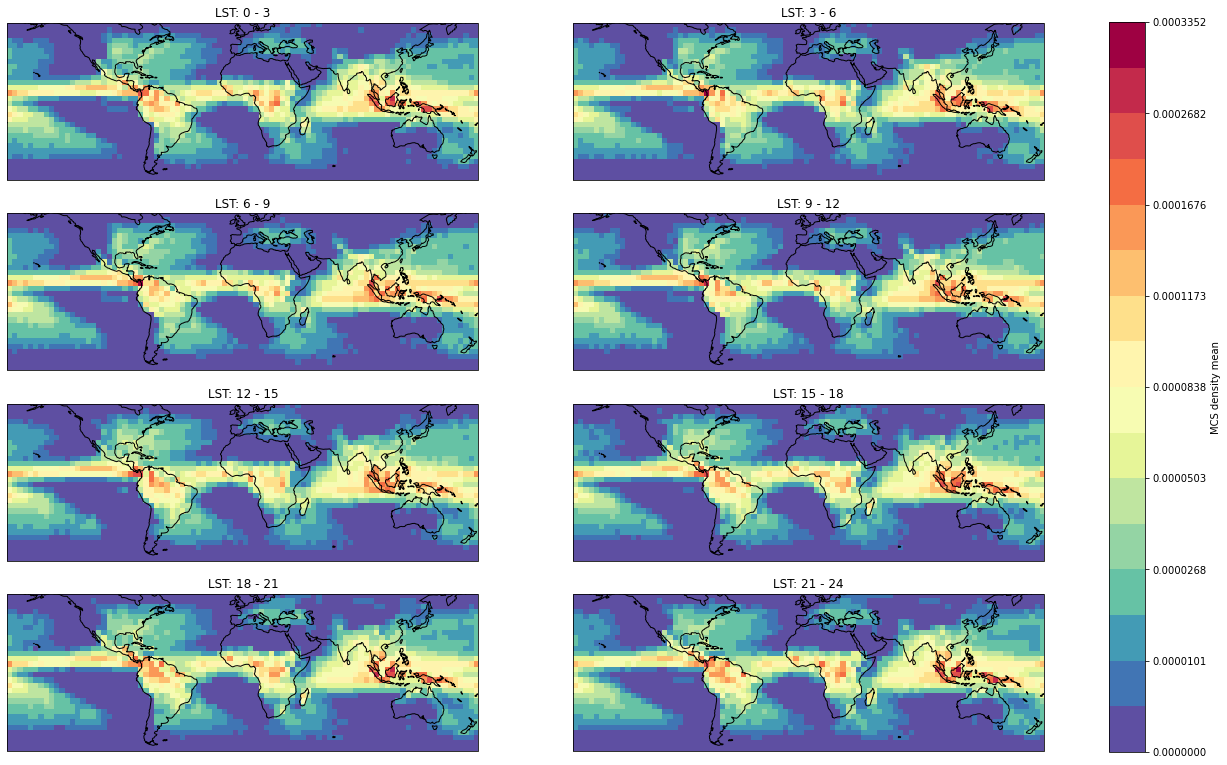

In [5]:
plotting.plot_diurnal_cycle(tracks, dhours=dhours, mode='mean')
fig = plt.gcf()
fig.set_size_inches(20, 11.26)  # full screen

Mean numbers of MCS in each 4x4 grid cell for each 3-hr window, based on Local Solar Time (LST). It is very tricky to spot any differences here.

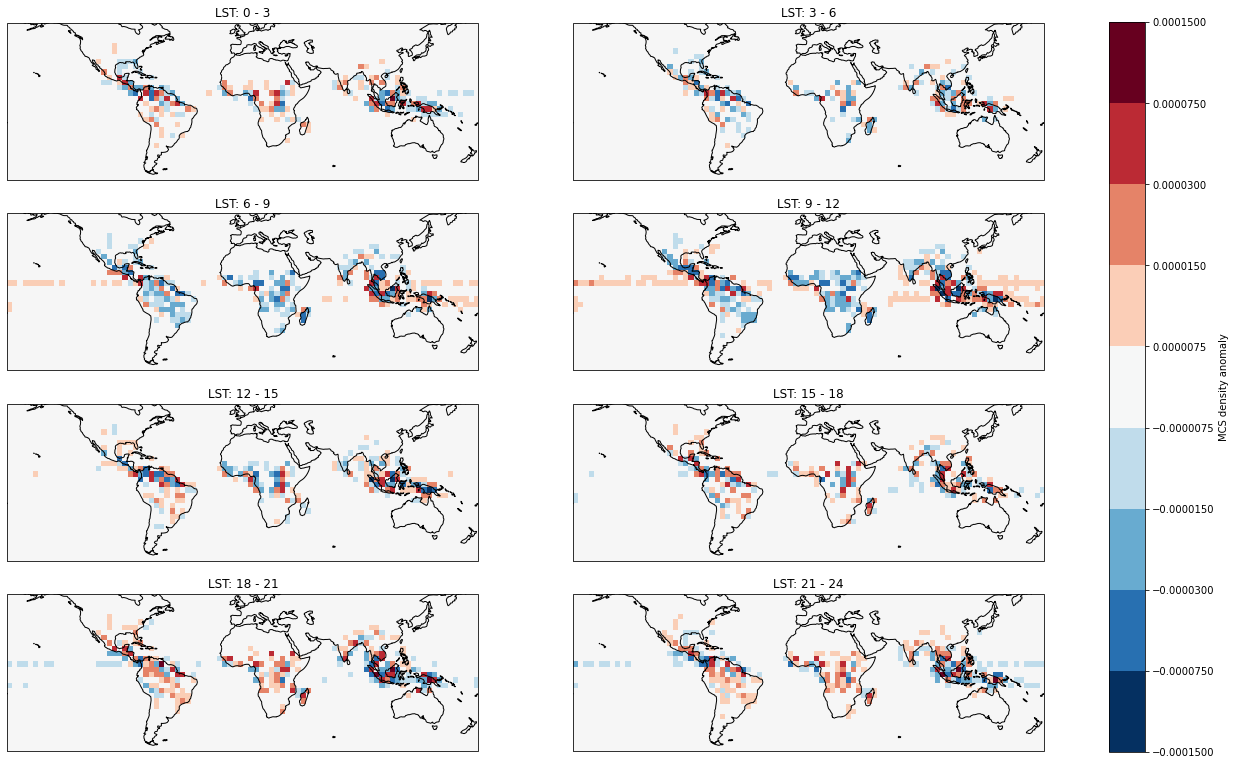

In [6]:
plotting.plot_diurnal_cycle(tracks, dhours=dhours, mode='anomaly')
fig = plt.gcf()
fig.set_size_inches(20, 11.26)  # full screen

Absolute difference between each 3-hr window and the mean (window - mean, using density for both 2D histograms). Shows some interesting features. 9-12 - clearly higher numbers of MCS over eq ocean, Maritime Continent. Fewer over N Amazon, central Africa, India. 18-21 - signal is mainly reversed with more MCS over land, (marginally) fewer over ocean.

/home/markmuetz/projects/mcs_prime/mcs_prime/plotting.py:88: RuntimeWarning: invalid value encountered in true_divide
  diff_hists[i] = hist / mean_hist


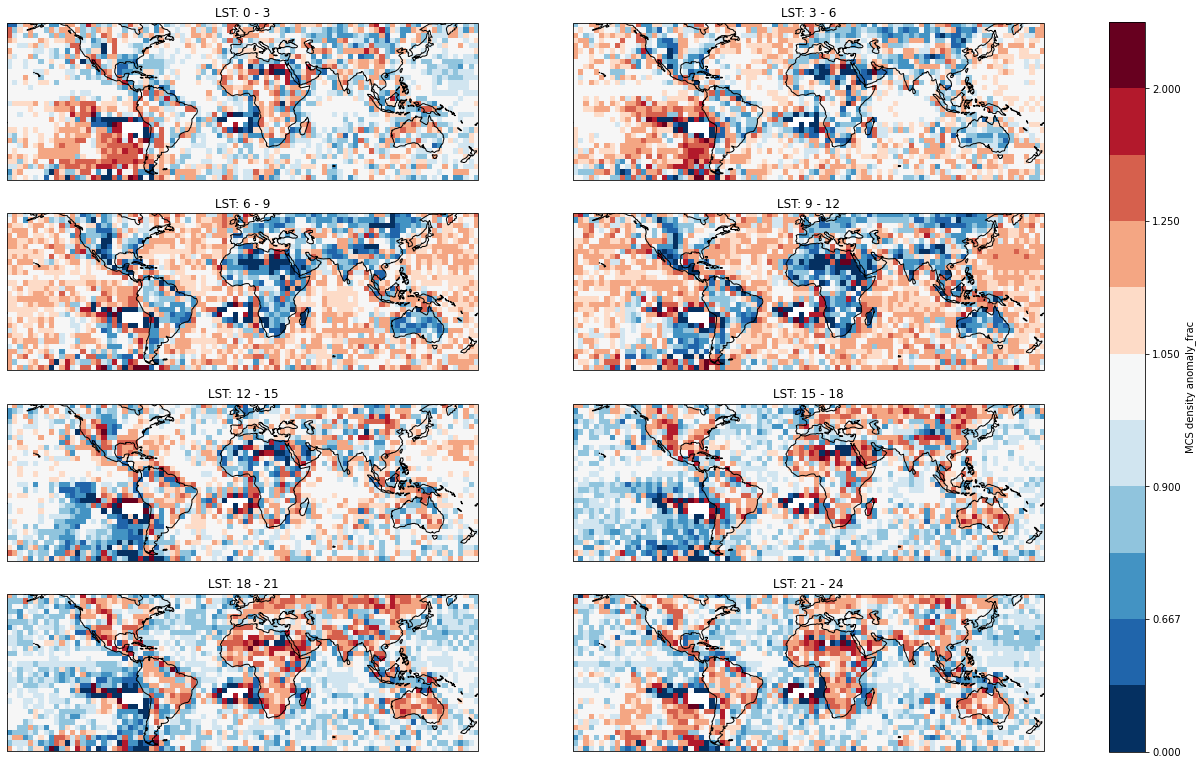

In [7]:
plotting.plot_diurnal_cycle(tracks, dhours=dhours, mode='anomaly_frac')
fig = plt.gcf()
fig.set_size_inches(20, 11.26)  # full screen

Fractional difference (window / mean). Could probably do with masking over regions like Sahara where there are approx. no MCS anyway. When they do occur, they are clearly early-mid-late afternoon. Signals obvious in absolute anomaly are no longer there, e.g. Pacific equatorial band at 9-12. Must be because numbers of MCS are high there anyway, so fractional difference not large (~~could perhaps pick out with better colours?~~ even with an improved colour scale near zero). But it's pretty clear over almost the entire ocean that relative numbers are larger 9-12, smaller 18-21, and vice versa over land.